# Data inputs and Display Libraries



In [ ]:

import pandas as pd
import numpy as np

pd.set_option('display.float_format', lambda x: '%.5f' % x)
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'


In [ ]:
#Installing Libraries
!pip install sweetviz
!pip install shap
!pip install unrar

     |████████████████████████████████| 15.1 MB 5.5 MB/s 
     |████████████████████████████████| 564 kB 5.2 MB/s 


# EDA Libraries

In [ ]:
import sweetviz as sv
#!pip install sweetviz

# Data Preprocessing Libraries

In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn import preprocessing
from sklearn.preprocessing import OrdinalEncoder


# Feature Selection & Modelling Libraries

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectPercentile, f_classif
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import pickle

# Metrics Libraries

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import f1_score
from matplotlib import pyplot
import matplotlib.pyplot as plt
from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_recall_curve


### Model Explanantion

In [ ]:
import shap

In [ ]:
!git clone https://github.com/univai-ghf/Classificationworkshop

Cloning into 'Classificationworkshop'...
remote: Enumerating objects: 18, done.
remote: Counting objects: 100% (18/18), done.
remote: Compressing objects: 100% (12/12), done.
remote: Total 18 (delta 1), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (18/18), done.


In [ ]:
#! unzip -q 'workshop_classification/prep_file.rar' -d 'workshop_classification/prep_file.csv'
!unrar x 'Classificationworkshop/prep_file.rar'  'Classificationworkshop'


UNRAR 5.50 freeware      Copyright (c) 1993-2017 Alexander Roshal


Extracting from Classificationworkshop/prep_file.rar

Extracting  Classificationworkshop/prep_file.csv                           3%  6% 10% 13% 17% 20% 24% 27% 30% 34% 37% 41% 44% 48% 51% 54% 58% 61% 65% 68% 72% 75% 78% 82% 85% 89% 92% 96% 99%  OK 
All OK


In [ ]:
### Run till here

In [ ]:
t1 = pd.read_csv("Classificationworkshop/prep_file.csv",sep=",")

# Step 1-  Look at the data

In [ ]:
t1.head()

,Unnamed: 0,income,age,experience,bureau_score,married,house_ownership,car_ownership,risk_flag,profession,city,state,current_job_years,current_house_years,device
0,19607,2514921,31.00000,4.00000,651.00000,single,rented,no,0,Psychologist,Chandrapur,Maharashtra,4.00000,14.00000,Oppo
1,75516,7047674,28.00000,4.00000,526.00000,single,rented,yes,0,Economist,Ramagundam[27],Telangana,3.00000,13.00000,Xiaomi
2,63804,2749317,30.00000,2.00000,526.00000,single,rented,no,0,Secretary,Ramagundam[27],Telangana,2.00000,14.00000,samsung
3,63676,7378274,24.00000,0.00000,764.00000,single,rented,no,0,Flight attendant,Adoni,Andhra Pradesh,0.00000,11.00000,samsung
4,50914,9574585,27.00000,5.00000,739.00000,single,rented,yes,0,Technician,Imphal,Manipur,5.00000,10.00000,Vivo


In [ ]:
 #![](./presentation/Capture1.png)


# Look at data - now to get the target variable distribution

In [ ]:
t1["risk_flag"].value_counts()

0    236567
1     43433
Name: risk_flag, dtype: int64

In [ ]:
t1["risk_flag"].value_counts(normalize=True)

0   0.84488
1   0.15512
Name: risk_flag, dtype: float64

# Look at data - listing string and numeric columns

In [ ]:
str_col_name_df = pd.read_csv("Classificationworkshop/str_cols.csv")
str_col_name_df.columns = ["index","col_name"]
str_col_name_list =list(str_col_name_df["col_name"])

num_col_name_df = pd.read_csv("Classificationworkshop/num_cols.csv")
num_col_name_df.columns = ["index","col_name"]
num_col_name_df=num_col_name_df.reset_index()
num_col_name_list = list(num_col_name_df["col_name"])

In [ ]:
print (str_col_name_list)
print (num_col_name_list)

['profession', 'married', 'house_ownership', 'car_ownership', 'city', 'state']
['income', 'age', 'experience', 'current_job_years', 'current_house_years', 'bureau_score']


In [ ]:
####Back to Slide

# EDA

In [ ]:
sweet_report = sv.analyze([t1,"full_data"],target_feat="risk_flag")

                                             |          | [  0%]   00:00 -> (? left)

In [ ]:
sweet_report.show_html('sweet_report.html')

Report sweet_report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [ ]:
#5 mins to run the code

In [ ]:
t0 = t1.copy()
for i in str_col_name_list:
    t1[i] = t1[i].str.lower().str.lstrip().str.rstrip()
    t1[i] = t1[i].str.replace("[^a-z\s]+","")


The default value of regex will change from True to False in a future version.


In [ ]:
####back to slide

# Train test split
### Before we do any preprocessing we want to keep train and test seperate

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(t1, t1["risk_flag"], test_size=0.33, random_state=42)

In [ ]:
x_train0 = x_train.reset_index()
x_test0 = x_test.reset_index()

In [ ]:
x_train0.shape, x_test0.shape

((187600, 16), (92400, 16))

#Label encoding string Variables -- baseline categorical approach

In [ ]:


enc = OrdinalEncoder()

x_train_str= pd.DataFrame(enc.fit_transform(x_train0[str_col_name_list]))
x_test_str = pd.DataFrame(enc.transform(x_test0[str_col_name_list]))

In [ ]:
viz1 = x_train_str.head()
viz1 = viz1.astype(int)
viz1.columns = str_col_name_list
viz1

,profession,married,house_ownership,car_ownership,city,state
0,23,1,2,0,94,25
1,8,1,2,0,219,18
2,41,1,2,0,131,2
3,17,1,2,0,52,13
4,47,0,1,1,14,14


In [ ]:
x_train_str.shape

(187600, 6)

In [ ]:
enc.categories_

[array(['air traffic controller', 'analyst', 'architect', 'army officer',
        'artist', 'aviator', 'biomedical engineer', 'chartered accountant',
        'chef', 'chemical engineer', 'civil engineer', 'civil servant',
        'comedian', 'computer hardware engineer', 'computer operator',
        'consultant', 'dentist', 'design engineer', 'designer', 'drafter',
        'economist', 'engineer', 'fashion designer', 'financial analyst',
        'firefighter', 'flight attendant', 'geologist', 'graphic designer',
        'hotel manager', 'industrial engineer', 'lawyer', 'librarian',
        'magistrate', 'mechanical engineer', 'microbiologist', 'official',
        'petroleum engineer', 'physician', 'police officer', 'politician',
        'psychologist', 'scientist', 'secretary', 'software developer',
        'statistician', 'surgeon', 'surveyor', 'technical writer',
        'technician', 'technology specialist', 'web designer'],
       dtype=object),
 array(['married', 'single'], dtype=

# Concatenating Numeric and categorical

In [ ]:
df_all_train1 = pd.concat([x_train_str,x_train0[num_col_name_list]],axis=1)
df_all_test1 = pd.concat([x_test_str,x_test0[num_col_name_list]],axis=1)

In [ ]:
sel_cols = str_col_name_list + num_col_name_list

In [ ]:
##back to presentation

# Building Model

In [ ]:

le = preprocessing.LabelEncoder()
y_train1 = le.fit_transform(y_train)
y_test1 = le.transform(y_test)

In [ ]:
class_weights = [0.1,0.9]



xgb = XGBClassifier(n_estimators=300,max_depth= 5,subsample= 0.2,class_weights = class_weights,scale_pos_weight=6,
                    colsample_bytree= 0.3)
xgb.fit(df_all_train1,y_train1)


XGBClassifier(class_weights=[0.1, 0.9], colsample_bytree=0.3, max_depth=5,
              n_estimators=300, scale_pos_weight=6, subsample=0.2)

In [ ]:
##back to presentation

# Measure

In [ ]:
def cf_mat_conv(cf_mat):
    cf_mat1 = pd.DataFrame(cf_mat)

    
    cols0 = cf_mat1.columns
    #print (cols0)
    cols1 = []
    rows1 = []
    for i in cols0:
        i1 = "pred_" + str(i)
        i2 = "actual_" + str(i)
        cols1.append(i1)
        rows1.append(i2)
    #print (rows1)
    cf_mat1.columns = cols1
    cf_mat1["vals"] = rows1
    return cf_mat1

In [ ]:
def get_metrics1(mod1,test_set,actual1,fg):
    mod = eval(mod1)
    pred=mod.predict(test_set)
    #print(pred)
    pred1=mod.predict_proba(test_set)[:,1]
    
    ac1 = accuracy_score(actual1, pred)
    cf_mat1 = confusion_matrix(actual1, pred, labels=None, sample_weight=None)
    cf_mat_orig = cf_mat1.copy()

    
    #print (b_test_b.shape)
    cf_mat1 = cf_mat_conv(cf_mat1)

    
    fpr, tpr, thresholds = roc_curve(actual1, pred1)
    auc_pr = average_precision_score(actual1, pred1)
    auc1 = auc(fpr, tpr)
    f1scr = f1_score(actual1, pred, average='macro')
    
    if(fg==1):
        pyplot.plot([0, 1], [0, 1], linestyle='--')
    # plot the roc curve for the model
        pyplot.plot(fpr, tpr, marker='.')
    # show the plot
        pyplot.show()

        precision, recall, thresholds = precision_recall_curve(actual1, pred1)
        pyplot.plot(precision, recall, marker='.')
        pyplot.show()

        cmd = ConfusionMatrixDisplay(cf_mat_orig)
        cmd.plot(values_format='')

    return ac1,cf_mat1,auc1,f1scr,auc_pr


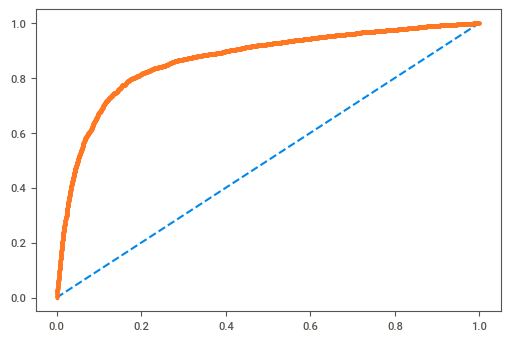

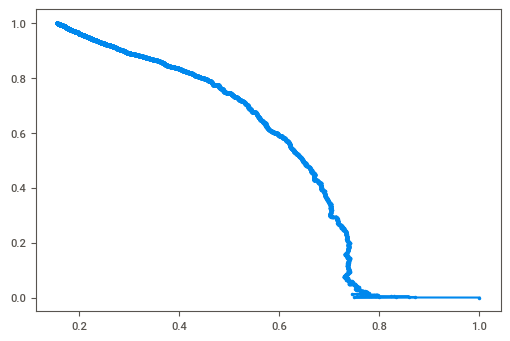

(0.7548593073593074,    pred_0  pred_1      vals
0   57635   20471  actual_0
1    2180   12114  actual_1, 0.8674575588782634, 0.6762941000896743, 0.5845599228765508)


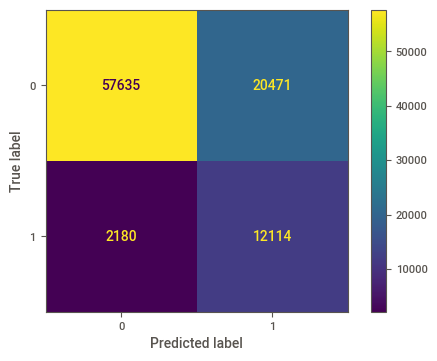

In [ ]:
print (get_metrics1("xgb",df_all_test1,y_test1,1))

In [ ]:
##back to presentation

# Explaining the Model

In [ ]:
df1_tr = pd.DataFrame(df_all_train1)
df1_tr.columns =sel_cols
explainer = shap.TreeExplainer(xgb)
shap_values = explainer.shap_values(df1_tr)



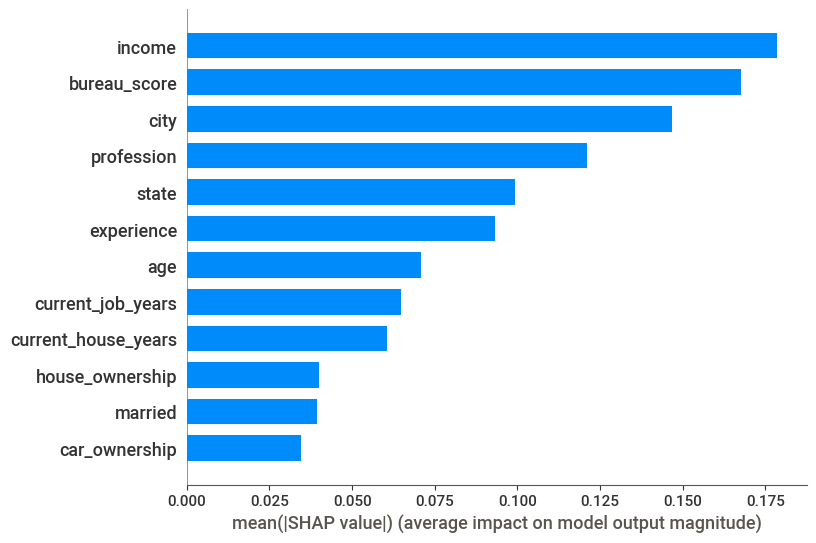

In [ ]:
shap.summary_plot(shap_values, df1_tr, plot_type="bar")

# Exercises

## One hot encoding

In [ ]:
enc = OneHotEncoder(handle_unknown='ignore')
df_one_hot_tr = pd.DataFrame(enc.fit_transform(np.array(x_train0[str_col_name_list])).todense())
df_one_hot_te = pd.DataFrame(enc.transform(np.array(x_test0[str_col_name_list])).todense())
colnames = enc.get_feature_names_out()

df_one_hot_tr.columns = colnames
df_one_hot_te.columns = colnames

In [ ]:
df_one_hot_tr.head()

,x0_air traffic controller,x0_analyst,x0_architect,x0_army officer,x0_artist,x0_aviator,x0_biomedical engineer,x0_chartered accountant,x0_chef,x0_chemical engineer,x0_civil engineer,x0_civil servant,x0_comedian,x0_computer hardware engineer,x0_computer operator,x0_consultant,x0_dentist,x0_design engineer,x0_designer,x0_drafter,x0_economist,x0_engineer,x0_fashion designer,x0_financial analyst,x0_firefighter,x0_flight attendant,x0_geologist,x0_graphic designer,x0_hotel manager,x0_industrial engineer,x0_lawyer,x0_librarian,x0_magistrate,x0_mechanical engineer,x0_microbiologist,x0_official,x0_petroleum engineer,x0_physician,x0_police officer,x0_politician,...,x4_ulhasnagar,x4_uluberia,x4_unnao,x4_vadodara,x4_varanasi,x4_vasaivirar,x4_vellore,x4_vijayanagaram,x4_vijayawada,x4_visakhapatnam,x4_warangal,x4_yamunanagar,x5_andhra pradesh,x5_assam,x5_bihar,x5_chandigarh,x5_chhattisgarh,x5_delhi,x5_gujarat,x5_haryana,x5_himachal pradesh,x5_jammu and kashmir,x5_jharkhand,x5_karnataka,x5_kerala,x5_madhya pradesh,x5_maharashtra,x5_manipur,x5_mizoram,x5_odisha,x5_puducherry,x5_punjab,x5_rajasthan,x5_sikkim,x5_tamil nadu,x5_telangana,x5_tripura,x5_uttar pradesh,x5_uttarakhand,x5_west bengal
0,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000
1,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
2,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
3,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
4,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00

In [ ]:
df_all_one_hot_train1 = pd.concat([df_one_hot_tr,x_train0[num_col_name_list]],axis=1)
df_all_one_hot_test1 = pd.concat([df_one_hot_te,x_test0[num_col_name_list]],axis=1)

In [ ]:
sel_cols = list(colnames) + num_col_name_list

In [ ]:
class_weights = [0.1,0.9]



xgb_ohe = XGBClassifier(n_estimators=100,max_depth= 5,subsample= 0.2,class_weights = class_weights,scale_pos_weight=6,
                    colsample_bytree= 0.3,n_jobs=6)
xgb_ohe.fit(df_all_one_hot_train1,y_train1)


XGBClassifier(class_weights=[0.1, 0.9], colsample_bytree=0.3, max_depth=5,
              n_jobs=6, scale_pos_weight=6, subsample=0.2)

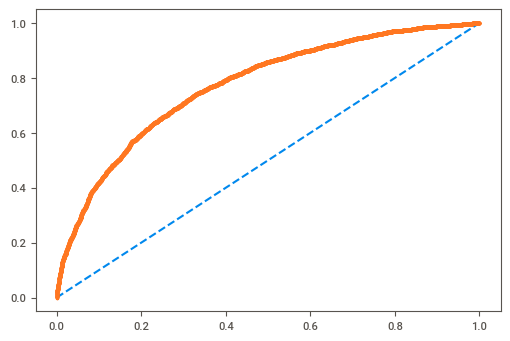

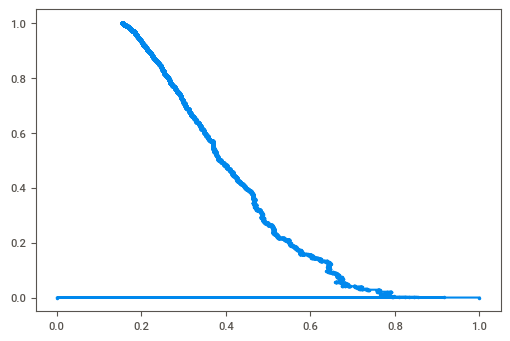

(0.568982683982684,    pred_0  pred_1      vals
0   40453   37653  actual_0
1    2173   12121  actual_1, 0.7732804120410663, 0.5242540512860935, 0.4118301103588312)


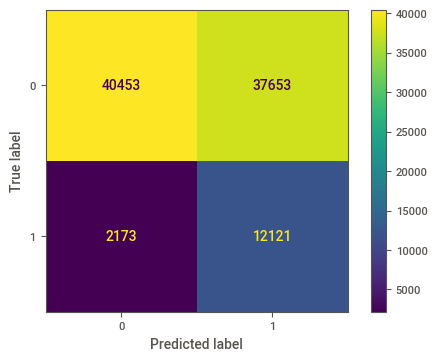

In [ ]:
print (get_metrics1("xgb_ohe",df_all_one_hot_test1,y_test1,1))

In [ ]:
df1_tr_ohe = pd.DataFrame(df_all_one_hot_train1)
df1_tr_ohe.columns =sel_cols
explainer_ohe = shap.TreeExplainer(xgb_ohe)
shap_values_ohe = explainer_ohe.shap_values(df1_tr_ohe)

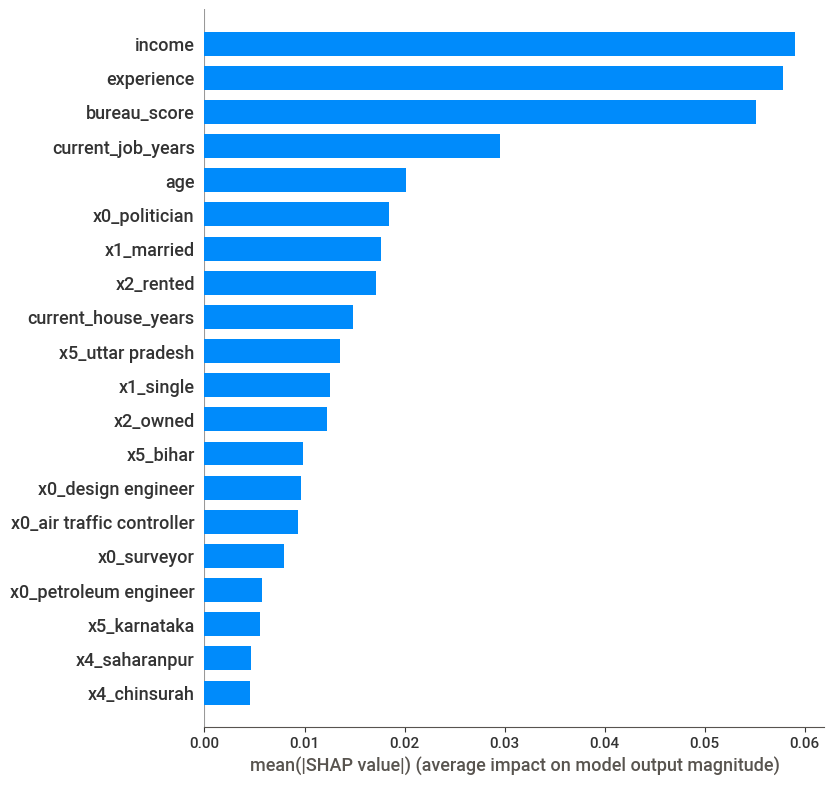

In [ ]:
shap.summary_plot(shap_values_ohe, df1_tr_ohe, plot_type="bar")

## Median impute of missing Values

In [ ]:
#### median impute of missing values

In [ ]:
imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
imp_mean.fit(x_train0[num_col_name_list])

x_train_num = pd.DataFrame(imp_mean.transform(x_train0[num_col_name_list]))
x_test_num = pd.DataFrame(imp_mean.transform(x_test0[num_col_name_list]))

x_train_num.columns = num_col_name_list
x_test_num.columns = num_col_name_list

SimpleImputer()

In [ ]:
df_all_imp_train1 = pd.concat([x_train_str,x_train_num],axis=1)
df_all_imp_test1 = pd.concat([x_test_str,x_test_num],axis=1)

In [ ]:
class_weights = [0.1,0.9]



xgb_imp = XGBClassifier(n_estimators=300,max_depth= 5,subsample= 0.2,class_weights = class_weights,scale_pos_weight=6,
                    colsample_bytree= 0.3)
xgb_imp.fit(df_all_imp_train1,y_train1)

XGBClassifier(class_weights=[0.1, 0.9], colsample_bytree=0.3, max_depth=5,
              n_estimators=300, scale_pos_weight=6, subsample=0.2)

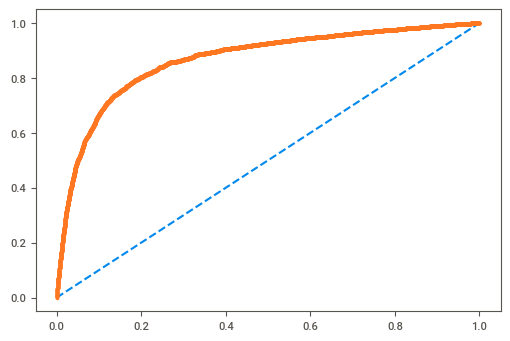

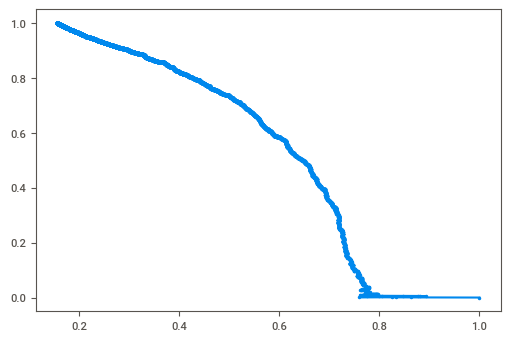

(0.7525541125541125,    pred_0  pred_1      vals
0   57310   20796  actual_0
1    2068   12226  actual_1, 0.8670360875223648, 0.6752389024911911, 0.5840536775650178)


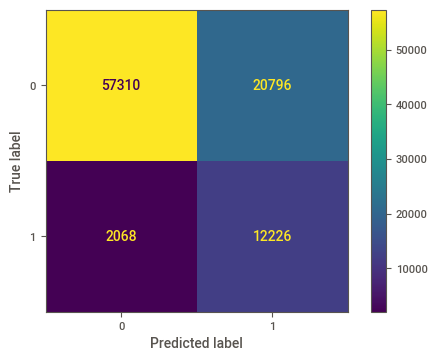

In [ ]:
print (get_metrics1("xgb_imp",df_all_imp_test1,y_test1,1))

## Putting all it together

In [ ]:
df_datasets = [df_all_test1,df_all_one_hot_test1,df_all_imp_test1]

for num,i in enumerate(["xgb","xgb_ohe","xgb_imp"]):
    print (num)
    ac1,cf_mat1,auc1,f1scr,auc_pr = get_metrics1(i,df_datasets[num],y_test1,0)
    
    
    df_met = pd.DataFrame([(ac1,auc1,f1scr,auc_pr)])
    df_met.columns = ["accuracy","auc","f1","auc_pr"]
    df_met["model"] = i
    
    if(num==0):  
        df_met_all = df_met
    else:
        df_met_all = pd.concat([df_met,df_met_all],axis=0)

0
1
2


In [ ]:
df_met_all.head()

,accuracy,auc,f1,auc_pr,model
0,0.75255,0.86704,0.67524,0.58405,xgb_imp
0,0.56898,0.77328,0.52425,0.41183,xgb_ohe
0,0.75486,0.86746,0.67629,0.58456,xgb


In [ ]:
##back to presentation